In [1]:
# loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression as lm
from sklearn.tree import DecisionTreeClassifier as treem
from sklearn.tree import plot_tree as treeplt
from sklearn.model_selection import train_test_split as tts

C:\Users\tomge\AppData\Local\Temp\ipykernel_9864\377724952.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# loading datasets
sberbankTrain = pd.read_csv('sberbank-russian-housing-market/train.csv')
sberbankTest = pd.read_csv('sberbank-russian-housing-market/test.csv')

In [3]:
# descriptive statistics for numerical variables
sberbankTrain.loc[:, sberbankTrain.columns.isin(['full_sq','life_sq','floor','max_floor','material','build_year','num_room','kitch_sq','state'])].describe()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state
count,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000
mean,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025
std,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000
50%,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000
75%,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000
max,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000


In [4]:
# descriptive statistics for categorical variables
sberbankTrain.loc[:, sberbankTrain.columns.isin(['product_type','sub_area'])].describe()

,product_type,sub_area
count,30471,30471
unique,2,146
top,Investment,Poselenie Sosenskoe
freq,19448,1776


In [5]:
sberTrainAggProdT = sberbankTrain['product_type'].value_counts()
sberTrainAggProdT

product_type
Investment       19448
OwnerOccupier    11023
Name: count, dtype: int64

In [6]:
sberTrainAggSubArea = sberbankTrain['sub_area'].value_counts()
sberTrainAggSubArea

sub_area
Poselenie Sosenskoe               1776
Nekrasovka                        1611
Poselenie Vnukovskoe              1372
Poselenie Moskovskij               925
Poselenie Voskresenskoe            713
                                  ... 
Molzhaninovskoe                      3
Poselenie Shhapovskoe                2
Poselenie Kievskij                   2
Poselenie Klenovskoe                 1
Poselenie Mihajlovo-Jarcevskoe       1
Name: count, Length: 146, dtype: int64

In [7]:
sberTrainAggMaterial = sberbankTrain['material'].value_counts()
sberTrainAggMaterial

material
1.0    14197
2.0     2993
5.0     1561
4.0     1344
6.0      803
3.0        1
Name: count, dtype: int64

In [8]:
sberTrainAggBldYr = sberbankTrain['build_year'].value_counts()
sberTrainAggBldYr

build_year
2014.0    919
2015.0    824
0.0       530
2013.0    464
1970.0    418
         ... 
1948.0      1
1895.0      1
1925.0      1
4965.0      1
71.0        1
Name: count, Length: 119, dtype: int64

In [9]:
sberTrainAggState = sberbankTrain['state'].value_counts()
sberTrainAggState

state
2.0     5844
3.0     5790
1.0     4855
4.0      422
33.0       1
Name: count, dtype: int64

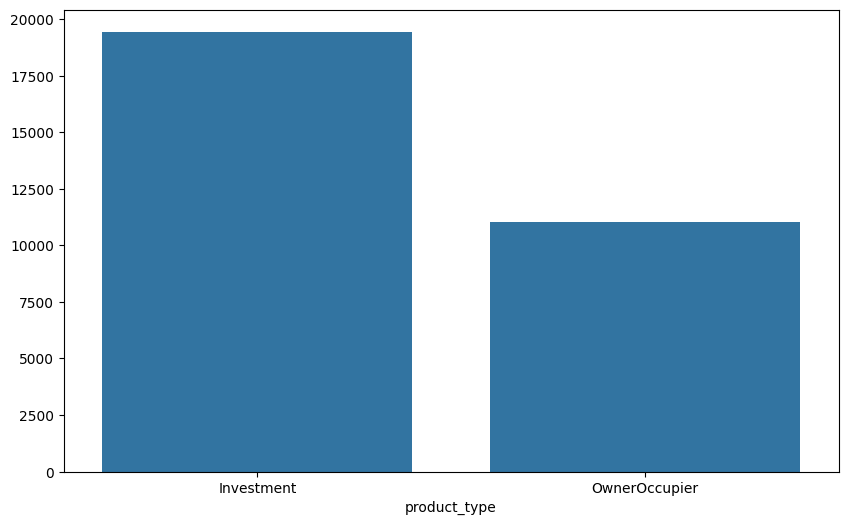

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(x = sberTrainAggProdT.index, y = sberTrainAggProdT.values)
plt.show()

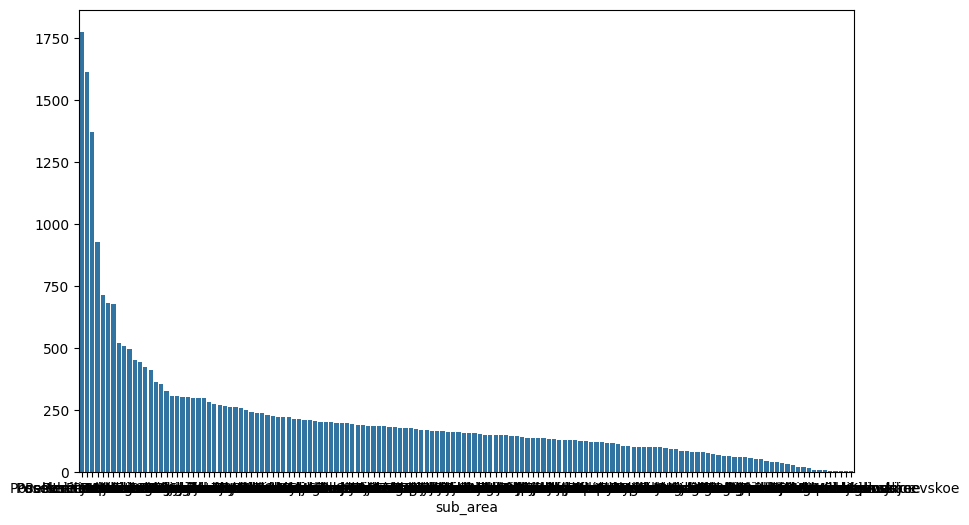

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(x = sberTrainAggSubArea.index, y = sberTrainAggSubArea.values)
plt.show()

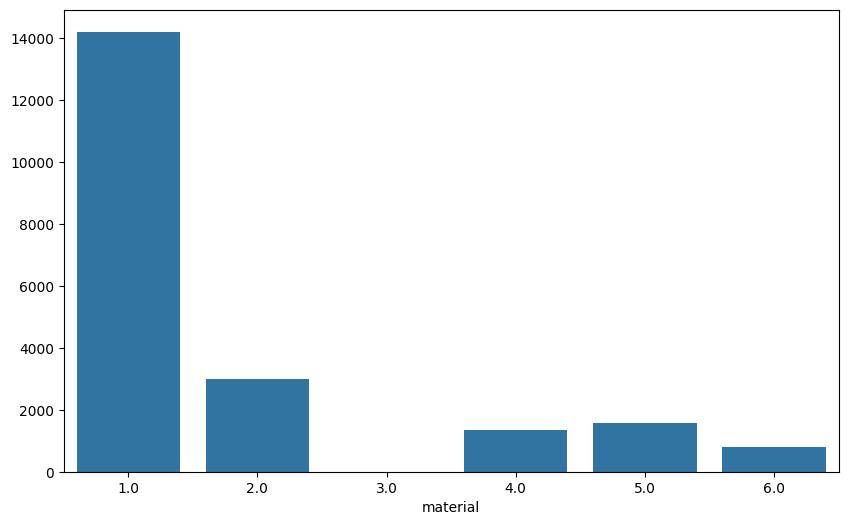

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(x = sberTrainAggMaterial.index, y = sberTrainAggMaterial.values)
plt.show()

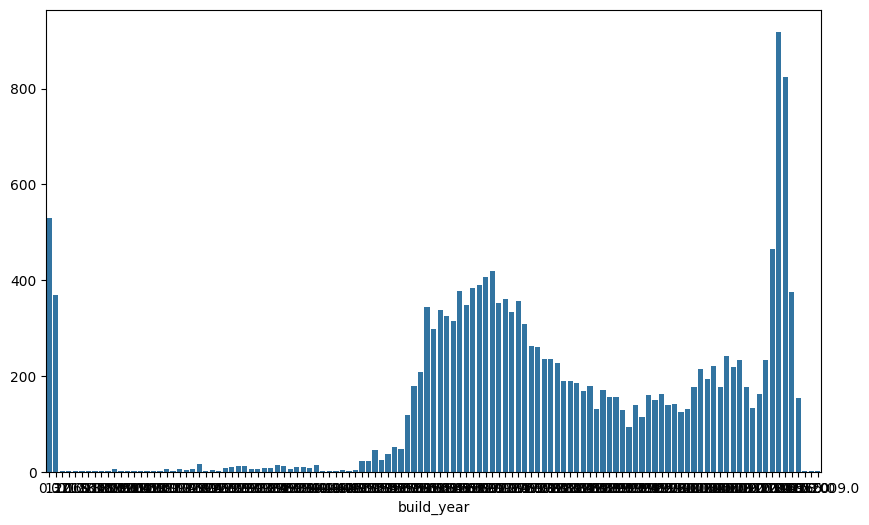

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(x = sberTrainAggBldYr.index, y = sberTrainAggBldYr.values)
plt.show()

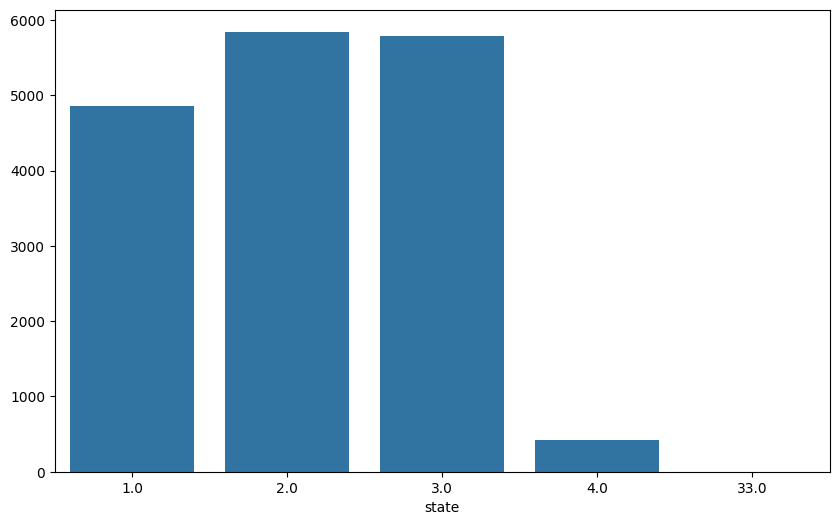

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(x = sberTrainAggState.index, y = sberTrainAggState.values)
plt.show()

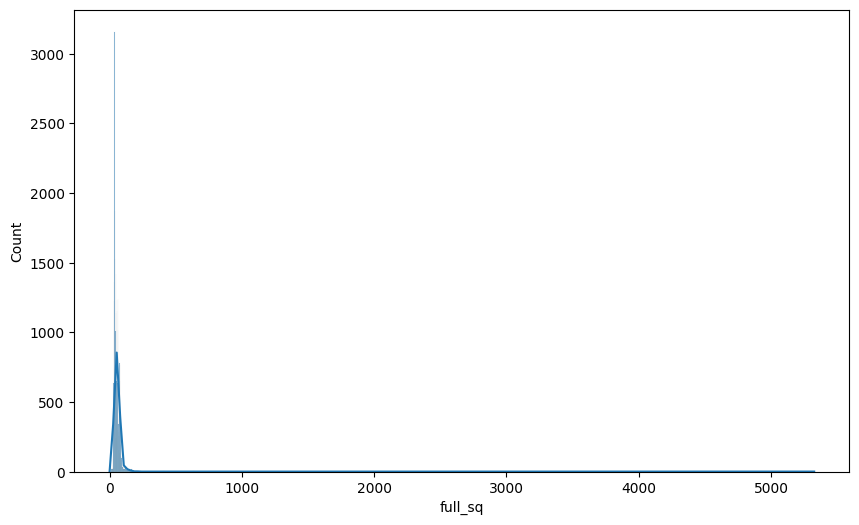

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(sberbankTrain['full_sq'], kde = True)
plt.show()

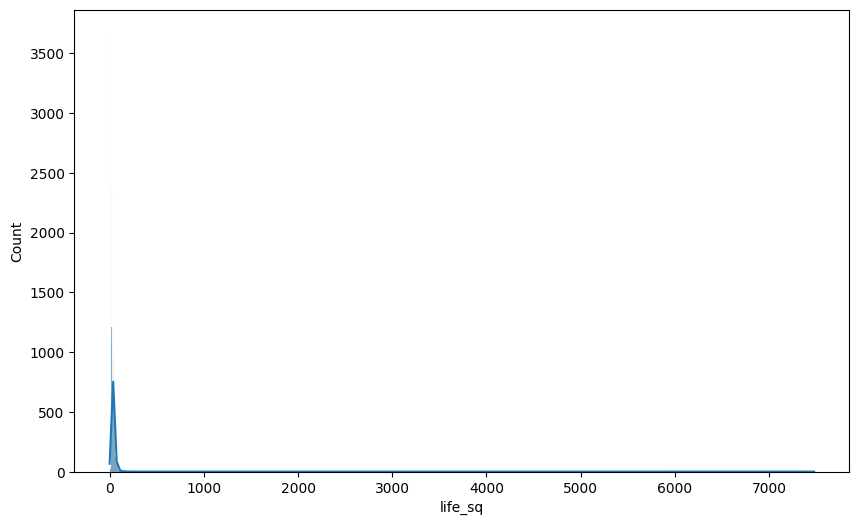

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(sberbankTrain['life_sq'], kde = True)
plt.show()

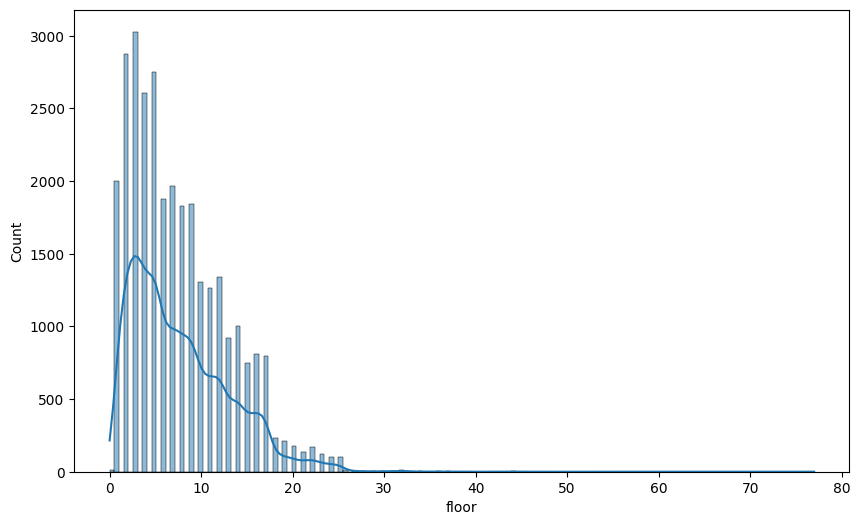

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(sberbankTrain['floor'], kde = True)
plt.show()

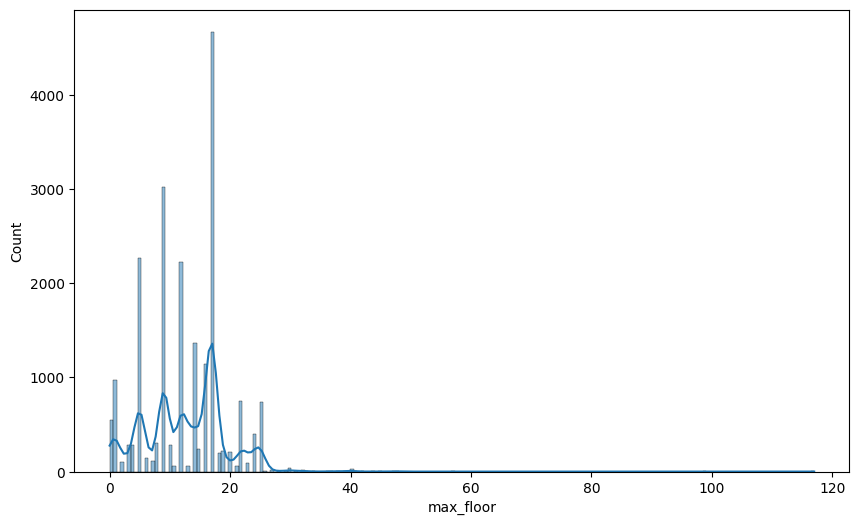

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(sberbankTrain['max_floor'], kde = True)
plt.show()

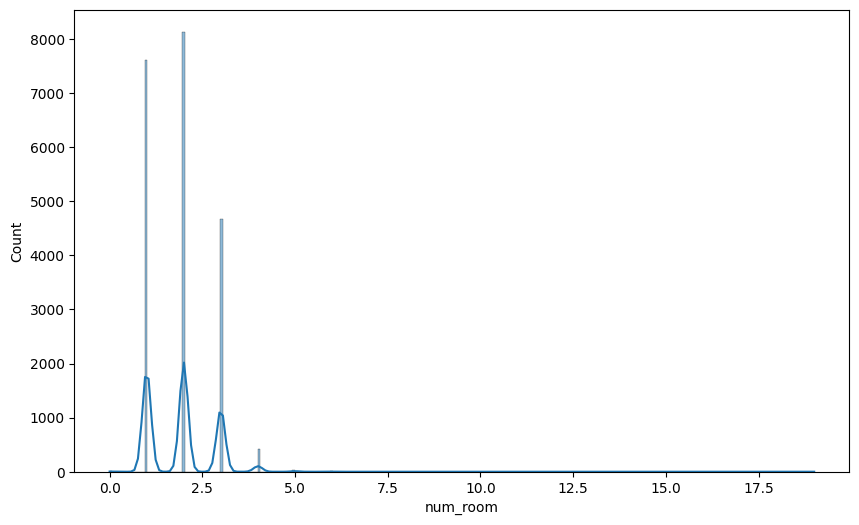

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(sberbankTrain['num_room'], kde = True)
plt.show()

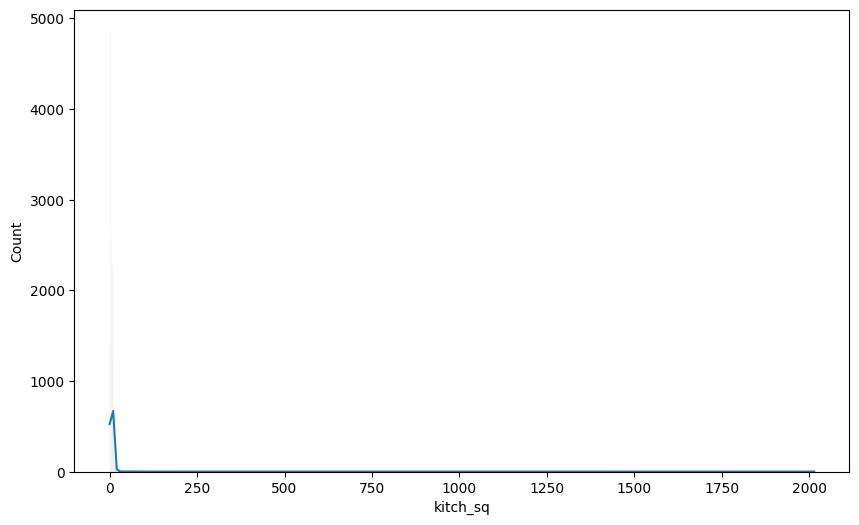

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(sberbankTrain['kitch_sq'], kde = True)
plt.show()

In [ ]:
sberbankTrain.loc[:, sberbankTrain.columns.isin(['full_sq','life_sq','floor','max_floor','material','build_year','num_room','kitch_sq','state','product_type','sub_area'])].isna().sum()

full_sq             0
life_sq          6383
floor             167
max_floor        9572
material         9572
build_year      13605
num_room         9572
kitch_sq         9572
state           13559
product_type        0
sub_area            0
dtype: int64